In [ ]:
라이브러리 임포트

In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, viewer, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [ ]:
PIL을 사용하여 영상 읽기, 저장 및 표시

In [2]:
im = Image.open("../images/parrot.png") 	# 영상 읽기, 영상 파일 경로 주의
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show() 									# 영상 표시

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [ ]:
명암도 영상

In [24]:
im_g = im.convert('L') 							# 컬러 영상을 명암도 영상으로 변환
im_g.save('../images/parrot_gray.png') 			# 디스크에 파일 저장
Image.open("../images/parrot_gray.png").show() # 디스크의 파일 읽어 표시

<class 'PIL.PngImagePlugin.PngImageFile'>


In [ ]:
Matplotlib을 사용하여 영상 읽기, 저장 및 표시

(960, 1280, 4) float32 <class 'numpy.ndarray'>


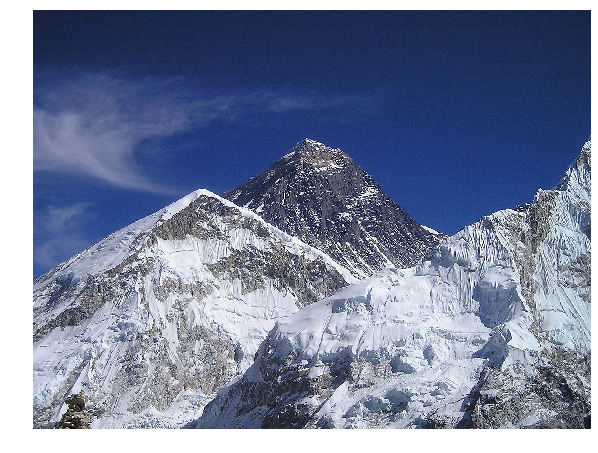

In [4]:
im = mpimg.imread("../images/hill.png") 	# numpy ndarray 영상 읽기
print(im.shape, im.dtype, type(im)) 		# png 파일은 α 채널 포함
# (960, 1280, 4) float32 <class 'numpy.ndarray'>

plt.figure(figsize=(10,10))
plt.imshow(im), plt.axis('off')
plt.show()

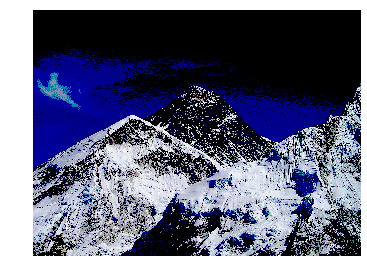

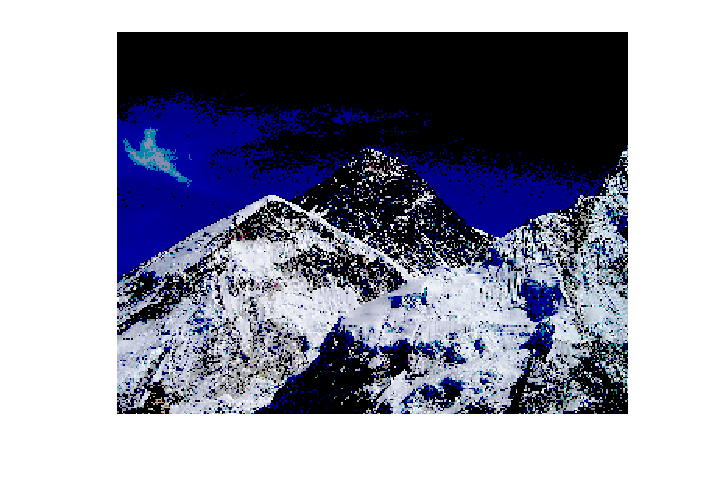

In [5]:
im1 = im
im1[im1 < 0.5] = 0 						# 어두운 영상 생성

plt.imshow(im1) 						# 영상 그리기
plt.axis('off') 						# 그래프에 축 없음
plt.tight_layout()
plt.savefig("../images/hill_dark.png")				# 영상 저장

im = mpimg.imread("../images/hill_dark.png")		# 저장 영상 읽기
plt.figure(figsize=(10,10))
plt.imshow(im), plt.axis('off'), plt.tight_layout()	# 한 행에 수행 가능
plt.show() # 영상 표시

In [ ]:
Matplotlib imshow()로 표시하는 동안 보간(Interpolating)

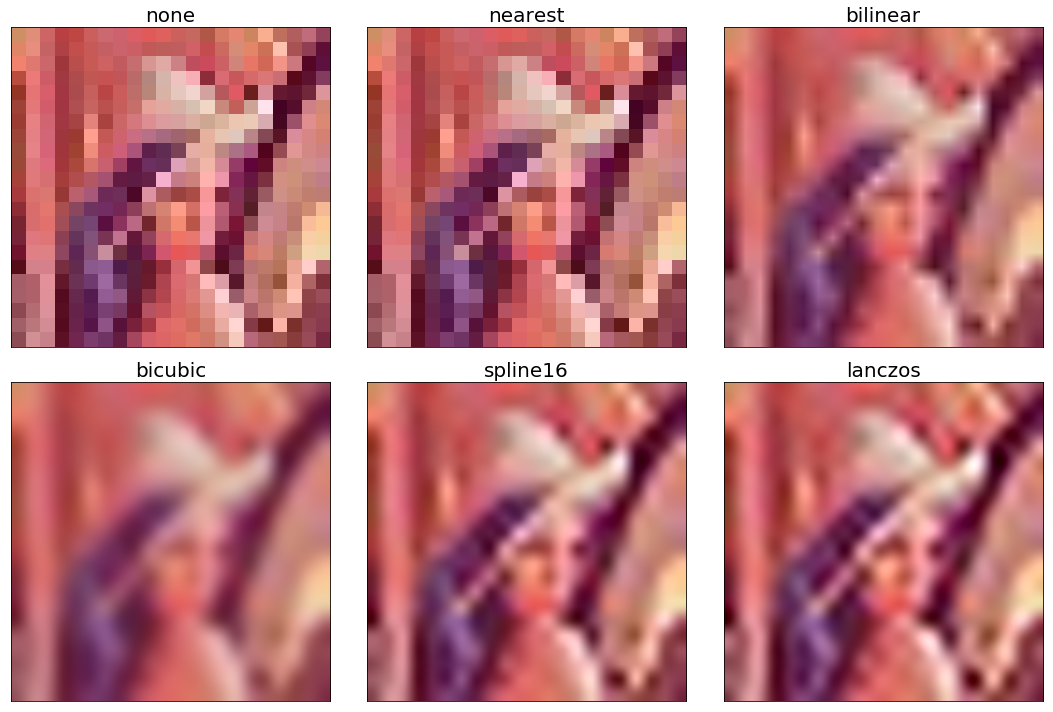

In [6]:
im = mpimg.imread("../images/lena_small.jpg") 				# ndarray 영상 읽기
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos'] # 보간 방법들

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), \
						subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
	ax.imshow(im, interpolation=interp_method)
	ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

In [ ]:
scikit-image를 사용하여 영상 읽기, 저장 및 표시

(340, 453, 3) uint8 <class 'numpy.ndarray'>


C:\Users\bae22\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


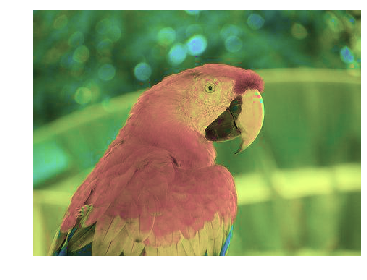

In [7]:
im = imread("../images/parrot.png") 			# 영상 읽기
print(im.shape, im.dtype, type(im))
# (362, 486, 3) uint8 <class 'numpy.ndarray'>
hsv = color.rgb2hsv(im) 						# 컬러 공간 변환 (RGB --> HSV)
hsv[:, :, 1] = 0.5 								# 채도 채널 값 변경
im1 = color.hsv2rgb(hsv) 						# 컬러 공간 환원(HSV --> RGB)

imsave('../images/parrot_hsv.png', im1) 		# 영상 저장
im = imread("../images/parrot_hsv.png")
plt.axis('off'), imshow(im)
show()

In [ ]:
팝업 창 표시

In [8]:
viewer = viewer.ImageViewer(im)
viewer.show()

[]

In [ ]:
scikit-image의 우주 비행사 데이터셋 사용

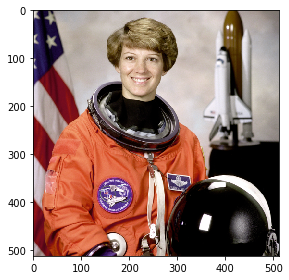

In [5]:
im = data.astronaut() 		# 우주 비행사 영상 읽기
imshow(im) 					# scikit-image 모듈의 영상 그리기 함수
show()

In [ ]:
scipy misc를 사용하여 영상 읽기, 저장 및 표시

(768, 1024, 3) uint8 <class 'numpy.ndarray'>


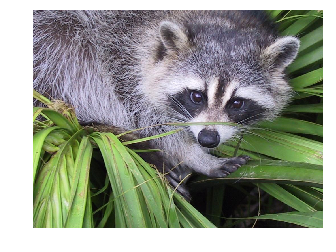

In [28]:
im = misc.face() 					# 라쿤 얼굴 영상 읽기
# misc.imsave('face.png', im) 		# SciPy 1.2 버전부터 함수 제거됨
im2 = Image.fromarray(im, "RGB")    # Image module(PIL) 모듈 사용
im2.save('./face.png')

print(im.shape, im.dtype, type(im))
plt.imshow(im), plt.axis('off') 	
plt.show()

In [29]:
im = misc.imread('../images/veg.jpg')
print(type(im), im.shape, im.dtype)
# <class 'numpy.ndarray'> (225, 225, 3) uint8
I

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [ ]:
imageio 모듈 사용

<class 'imageio.core.util.Array'> (225, 225, 3) uint8


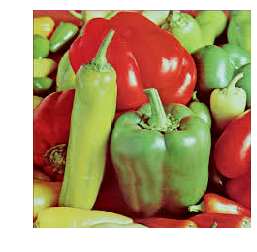

In [33]:
import imageio

im = imageio.imread('../images/pepper.jpg') # 영상 읽기
print(type(im), im.shape, im.dtype)
# <class 'imageio.core.util.Image'> (225, 225, 3) uint8
plt.imshow(im), plt.axis('off')
plt.show()